In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi

from skimage import morphology as mp
#from skimage.morphology import watershed
from skimage.morphology import remove_small_objects
from skimage.measure import label, regionprops
from skimage.segmentation import watershed
from skimage.feature import peak_local_max

from skimage import io
from skimage.filters import threshold_otsu

from skimage.color import rgb2gray,rgb2grey
from skimage.util import img_as_ubyte

Read the binary image

In [2]:
im = io.imread('circles.png')

Compute the exact Euclidean distance transform and find peaks in it

In [3]:
distance = ndi.distance_transform_edt(im)

Find peaks in it, labeling them subsequently to use them as markers for the watershed algorithm

In [4]:
local_maximum = peak_local_max(distance, indices=False, exclude_border=0)
markers = ndi.label(local_maximum)[0]

Run the watershed transform with the marker obtained above to get the output segmentation labels

In [5]:
labels = watershed(-distance, markers, mask=im, watershed_line = True)

Plot the images and superimpose the segmentation labels on the input binary image to get the segmented image. 

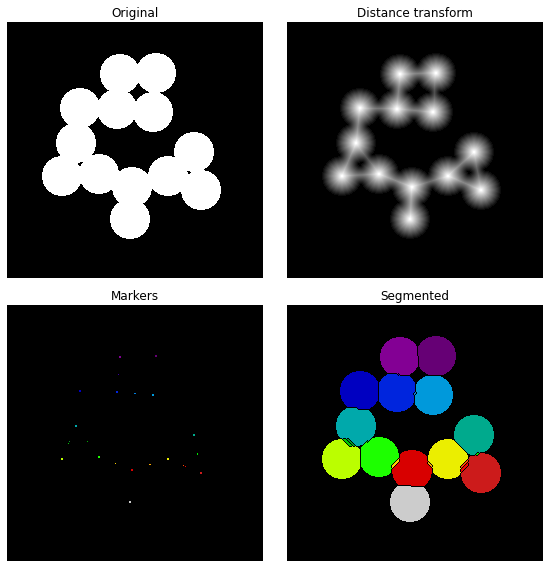

In [6]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 8), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(im, cmap=plt.cm.gray, interpolation='nearest')
ax[0].set_title("Original")

ax[1].imshow(distance, cmap=plt.cm.gray, interpolation='nearest')
ax[1].set_title("Distance transform")

ax[2].imshow(markers, cmap=plt.cm.nipy_spectral, interpolation='nearest')
ax[2].set_title("Markers")

ax[3].imshow(im, cmap=plt.cm.gray, interpolation='nearest')
ax[3].imshow(labels, cmap=plt.cm.nipy_spectral, interpolation='nearest')
ax[3].set_title("Segmented")

for a in ax:
    a.axis('off')

fig.tight_layout()
plt.show()

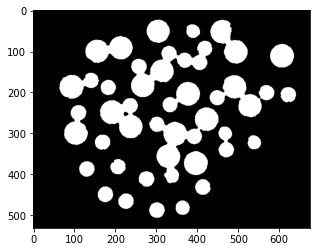

In [7]:
im = io.imread('wood_dowels.png')
#th = threshold_otsu(im)
#im_bw = im > th
#plt.imshow(im_bw,cmap=plt.cm.gray)
#plt.show()
se = mp.disk(3)
im = mp.closing(mp.opening(im,se),se)
th = threshold_otsu(im)
im_bw = im > th
plt.imshow(im_bw,cmap=plt.cm.gray)
plt.show()

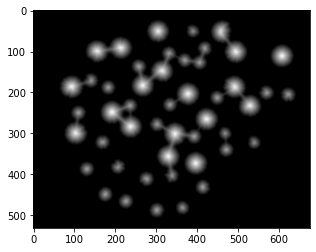

In [8]:
im_d = ndi.distance_transform_edt(im_bw)
plt.imshow(im_d,cmap=plt.cm.gray)
plt.show()

In [9]:
#im_d = -im_d
#plt.imshow(im_d,cmap=plt.cm.gray)
#plt.show()

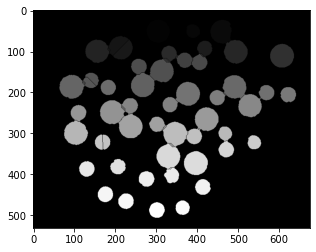

In [10]:
local_maxes = peak_local_max(im_d, indices=False, exclude_border=0)
markers = ndi.label(local_maxes)[0]
L = watershed(-im_d,markers,mask=im_bw,watershed_line=True)
#wr = L==0
plt.imshow(L, cmap=plt.cm.gray)
plt.show()

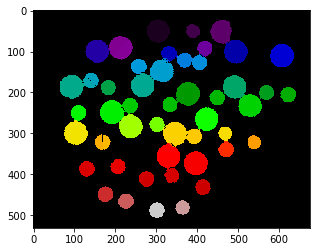

In [11]:
#wr = L == 0
plt.imshow(im_bw,cmap=plt.cm.gray,interpolation='nearest')
plt.imshow(L,cmap=plt.cm.nipy_spectral,interpolation='nearest')
plt.show()

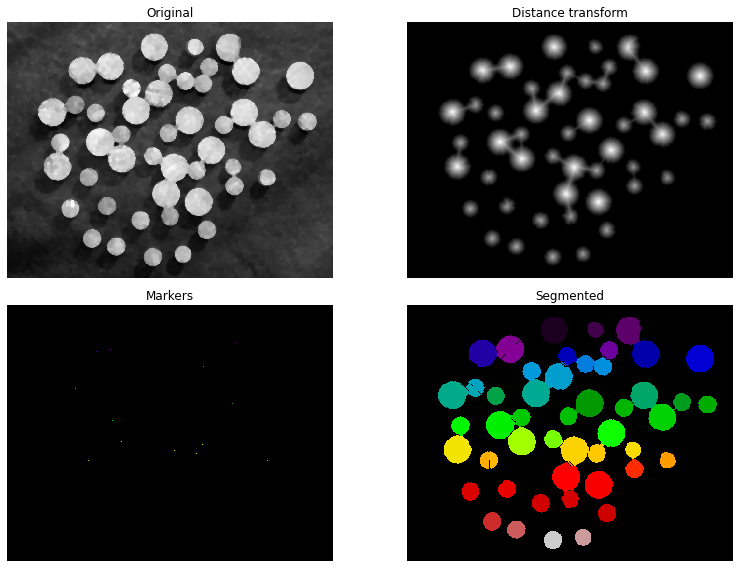

In [12]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(im, cmap=plt.cm.gray, interpolation='nearest')
ax[0].set_title("Original")

ax[1].imshow(im_d, cmap=plt.cm.gray, interpolation='nearest')
ax[1].set_title("Distance transform")

ax[2].imshow(markers, cmap=plt.cm.nipy_spectral, interpolation='nearest')
ax[2].set_title("Markers")

ax[3].imshow(im, cmap=plt.cm.gray, interpolation='nearest')
ax[3].imshow(L, cmap=plt.cm.nipy_spectral, interpolation='nearest')
ax[3].set_title("Segmented")

for a in ax:
    a.axis('off')

fig.tight_layout()
plt.show()